In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [5]:
# reflect an existing database into a new model
Base.prepare(autoload_with=engine)
# reflect the tables


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
Station = Base.classes.station

In [8]:
# Save references to each table
Measurement = Base.classes.measurement


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#test the dictionaries for info

# Measurement columns = id, station, prcp, date, tobs
measure_test = session.query(Measurement).first()
measure_test.__dict__

#Station columns = id, name, latitude, elevation, station, longitude
station_test = session.query(Station).first()
station_test.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff1a79a8890>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'elevation': 3.0,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1}

In [11]:
# Find the most recent date in the data set.
last_date = session.query(func.max(Measurement.date)).scalar()
print(last_date)

2017-08-23


2016-08-23


TypeError: unhashable type: 'numpy.ndarray'

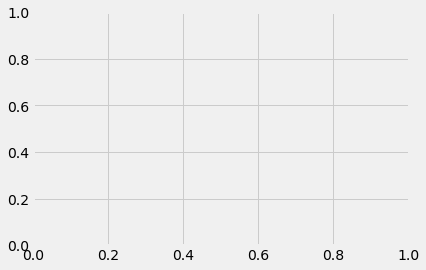

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most RECENT (Confused about this defenition) data point in the database. 
# last_date

# Calculate the date one year from the last date in data set.
previous_year = session.query(func.date(func.max(Measurement.date), '-365 days')).scalar()
print(previous_year)

# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= previous_year).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

rain_date = [rain[0] for date in rain]
percp = [rain[1] for prcp in rain]

rain_df = pd.DataFrame(rain, columns=['rain_date', 'percp'])

# Sort the dataframe by date
rain_df.set_index('rain_date')

# Use Pandas Plotting with Matplotlib to plot the data
# fig, ax = plt.subplots(figsize=10,10)
# ax.bar(rain_date, percp, width=1, color='b', alpha=.25)
rain_graph = plt.bar(rain_date, percp, color='b', alpha=0.25, align='center')
plt.show()



In [ ]:
# Test the graph
rain_graph = plt.bar(rain_date, percp, color='b', alpha=0.25, align='center')
plt.show()

In [ ]:
# Test for the df- there are multiple percps for same day, so they must be summed
rain_df.head()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain_df.describe()

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Station).count()
station_count

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station)).all()
station_activity

In [ ]:
# most active station id = 'USC00519281'

active_station = 'USC00519281'
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
climate_anly = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                             filter(Measurement.station == active_station).all()
climate_anly

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
x_axis = session.query(Measurement.tobs).filter(Measurement.date >= one_year_ago)
y_axis = session.query(Measurement.date).filter(Measurement.date >= one_year_ago)
plt

# Close session

In [ ]:
# Close Session
session.close()